<a href="https://colab.research.google.com/github/ttobaegi/ML_Python/blob/master/EDA_Ecommerce2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# drive를 colab에 연결해서 데이터 로딩하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd     # data preprocessing
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

plt.style.use('seaborn-whitegrid')

# 파일 불러오기

In [5]:
master=pd.read_csv('/content/drive/MyDrive/Project_2021/master1.csv', sep=',')
customer=pd.read_csv('/content/drive/MyDrive/Project_2021/Custom.csv', sep=',')
search1=pd.read_csv('/content/drive/MyDrive/Project_2021/Search1.csv', sep=',')
search2=pd.read_csv('/content/drive/MyDrive/Project_2021/Search2.csv', sep=',')
session=pd.read_csv('/content/drive/MyDrive/Project_2021/Session.csv', sep=',')
product=pd.read_csv('/content/drive/MyDrive/Project_2021/Product.csv', sep=',')
indicator1=pd.read_csv('/content/drive/MyDrive/Project_2021/indicator1.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# PreProcessing
1. 컬럼명 소문자로 변경

In [6]:
#컬럼명 소문자로 변경
session_col = session.columns
search1_col = search1.columns
search2_col = search2.columns
customer_col = customer.columns
master_col = master.columns
product_col = product.columns

cols = (session_col, search1_col, search2_col, customer_col, master_col, product_col)
df = (session, search1, search2, customer, master, product)
for i in range(0,6):
  c_lower = []
  for ii in cols[i] :
    c_lower.append(ii.lower())
  df[i].columns=c_lower

In [7]:
for i in range(0,6):
  print(df[i].columns)

Index(['clnt_id', 'sess_id', 'sess_seq', 'sess_dt', 'tot_pag_view_ct',
       'tot_sess_hr_v', 'dvc_ctg_nm', 'zon_nm', 'city_nm'],
      dtype='object')
Index(['clnt_id', 'sess_id', 'kwd_nm', 'search_cnt'], dtype='object')
Index(['sess_dt', 'kwd_nm', 'search_cnt'], dtype='object')
Index(['clnt_id', 'clnt_gender', 'clnt_age'], dtype='object')
Index(['pd_c', 'pd_nm', 'clac1_nm', 'clac2_nm', 'clac3_nm'], dtype='object')
Index(['clnt_id', 'sess_id', 'hits_seq', 'pd_c', 'pd_add_nm', 'pd_bra_nm',
       'pd_buy_am', 'pd_buy_ct'],
      dtype='object')


In [8]:
# any() > series df 모두 적용 가능
# checks whether any value in the caller object is not 0 and returns True for that
session.isnull().any()
# tot_sesshr_v, tot_pag_view_ct 에 null값 존재

clnt_id            False
sess_id            False
sess_seq           False
sess_dt            False
tot_pag_view_ct     True
tot_sess_hr_v       True
dvc_ctg_nm         False
zon_nm             False
city_nm            False
dtype: bool

In [24]:
customer.head(1)

,clnt_id,clnt_gender,clnt_age
0,4830726,F,30


In [25]:
master.head(1)  # Product 상세 정보 포함 (대분류 중분류 소분류 상품이름)

,pd_c,pd_nm,clac1_nm,clac2_nm,clac3_nm
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠


In [45]:
print(product.info())
print(session.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024906 entries, 0 to 5024905
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   clnt_id    int64 
 1   sess_id    int64 
 2   hits_seq   int64 
 3   pd_c       int64 
 4   pd_add_nm  object
 5   pd_bra_nm  object
 6   pd_buy_am  object
 7   pd_buy_ct  object
dtypes: int64(4), object(4)
memory usage: 306.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   clnt_id          int64  
 1   sess_id          int64  
 2   sess_seq         int64  
 3   sess_dt          int64  
 4   tot_pag_view_ct  float64
 5   tot_sess_hr_v    object 
 6   dvc_ctg_nm       object 
 7   zon_nm           object 
 8   city_nm          object 
dtypes: float64(1), int64(4), object(4)
memory usage: 186.3+ MB
None


In [27]:
product.head(1)

,clnt_id,sess_id,hits_seq,pd_c,pd_add_nm,pd_bra_nm,pd_buy_am,pd_buy_ct
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1


In [28]:
# df[df['col'] 조건] 해당하는 열만 추출
product[product['pd_buy_ct']==0]        

,clnt_id,sess_id,hits_seq,pd_c,pd_add_nm,pd_bra_nm,pd_buy_am,pd_buy_ct


- product 테이블은 구매내역만 포함하고 있음 
- Orders table 생성(Products, sessions, customer 정보)

In [58]:
print(session.shape)
print(product.shape)
print(orders.shape)

(2712907, 9)
(5024906, 8)
(5024906, 14)


###Orders 테이블 생성

In [9]:
# left/right join : pd.merge(tables, left_on='key', right_on='key', how='left'|'right')
# drop columns : df.drop(['col1','col2',...], axis=1)
# rename column

orders=pd.merge(product, session, left_on=('clnt_id','sess_id'), right_on=('clnt_id','sess_id'), how='left').drop(['pd_bra_nm'], axis=1)
orders.head(2)

,clnt_id,sess_id,hits_seq,pd_c,pd_add_nm,pd_buy_am,pd_buy_ct,sess_seq,sess_dt,tot_pag_view_ct,tot_sess_hr_v,dvc_ctg_nm,zon_nm,city_nm
0,4139680,7605037,12,642112,색상:워터멜론,"39,000",1,1,20180526,21.0,902,desktop,Seoul,Seoul
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,"39,000",2,172,20180413,18.0,113,mobile,Gyeonggi-do,Icheon-si


In [53]:
type(orders)

pandas.core.frame.DataFrame

In [10]:
orders=pd.merge(orders, master, left_on="pd_c", right_on="pd_c", how='left').drop(['pd_add_nm'], axis=1)
orders.rename(columns={'clnt_id_x':'clnt_id'}, inplace=True) 

In [11]:
orders=pd.merge(orders, customer, left_on="clnt_id", right_on="clnt_id", how='left')
orders.head(2)

,clnt_id,sess_id,hits_seq,pd_c,pd_buy_am,pd_buy_ct,sess_seq,sess_dt,tot_pag_view_ct,tot_sess_hr_v,dvc_ctg_nm,zon_nm,city_nm,pd_nm,clac1_nm,clac2_nm,clac3_nm,clnt_gender,clnt_age
0,4139680,7605037,12,642112,"39,000",1,1,20180526,21.0,902,desktop,Seoul,Seoul,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,NaN,NaN
1,4140076,10189797,13,570603,"39,000",2,172,20180413,18.0,113,mobile,Gyeonggi-do,Icheon-si,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,F,40.0


- clnt gender / age 정보비회원으로 구매한경우 NaN

In [ ]:
orders.head(2)

,clnt_id,sess_id,hits_seq,pd_c,pd_buy_am,pd_buy_ct,sess_seq,sess_dt,tot_pag_view_ct,tot_sess_hr_v,dvc_ctg_nm,zon_nm,city_nm,pd_nm,clac1_nm,clac2_nm,clac3_nm,clnt_gender,clnt_age
0,4139680,7605037,12,642112,"39,000",1,1,20180526,21.0,902,desktop,Seoul,Seoul,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,NaN,NaN
1,4140076,10189797,13,570603,"39,000",2,172,20180413,18.0,113,mobile,Gyeonggi-do,Icheon-si,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,F,40.0


In [73]:
np.isnan(orders.loc[0,'clnt_age'])

True

In [86]:
orders[np.isnan(orders['clnt_age'])==True].shape[0] / orders.shape[0] 

0.20623649477224051

- 고객 성별/나이 정보 20% na

Text(0.5, 1.0, 'age distribution')

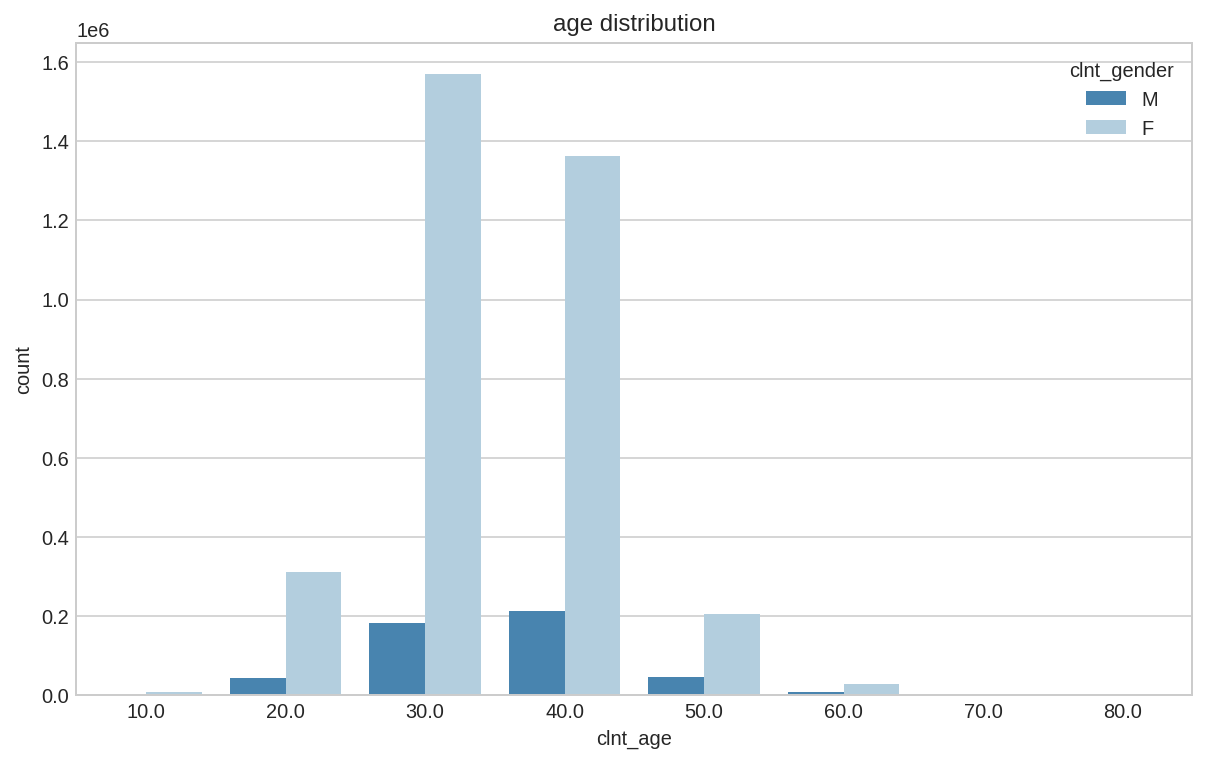

In [98]:
# sns.countplot 구간별 빈도수 > 분포파악에 용이
plt.figure(figsize=(10,6))
sns.countplot(data=orders.sort_values('clnt_age'), x='clnt_age', hue='clnt_gender' , palette='Blues_r').set_title('age distribution')

No handles with labels found to put in legend.


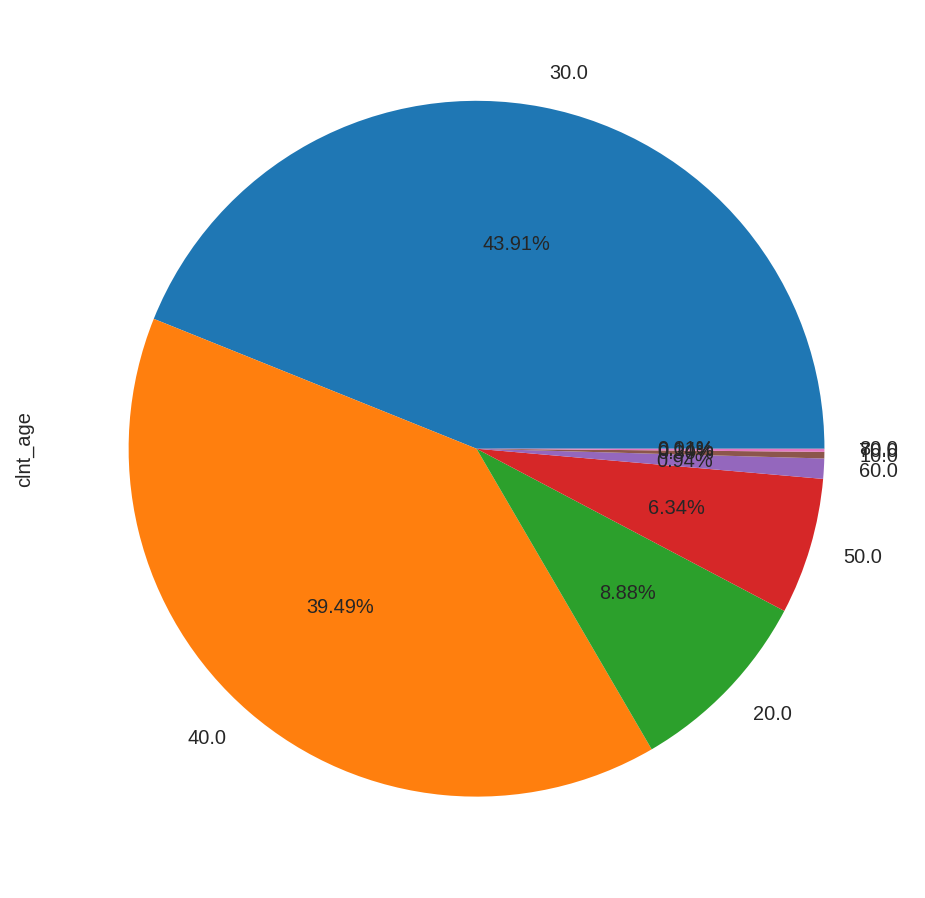

In [97]:
plt.figure(figsize=(8,8))
plt.legend()
orders.clnt_age.value_counts().plot.pie(autopct='%.2f%%')

- 80%가 30-40대 여성 고객

In [108]:
?str_replace()

Object `str_replace` not found.


In [12]:
orders['pd_buy_am']=orders['pd_buy_am'].apply(lambda x : x.replace(",",""))

In [13]:
orders['pd_buy_ct']=orders['pd_buy_ct'].apply(lambda x : str(x).replace(",",""))

In [14]:
orders['pd_buy_am'] = pd.to_numeric(orders['pd_buy_am'])
orders['pd_buy_ct'] = pd.to_numeric(orders['pd_buy_ct'])
orders['amount']= orders['pd_buy_am']*orders['pd_buy_ct']

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024906 entries, 0 to 5024905
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   clnt_id          int64  
 1   sess_id          int64  
 2   hits_seq         int64  
 3   pd_c             int64  
 4   pd_buy_am        int64  
 5   pd_buy_ct        int64  
 6   sess_seq         int64  
 7   sess_dt          int64  
 8   tot_pag_view_ct  float64
 9   tot_sess_hr_v    object 
 10  dvc_ctg_nm       object 
 11  zon_nm           object 
 12  city_nm          object 
 13  pd_nm            object 
 14  clac1_nm         object 
 15  clac2_nm         object 
 16  clac3_nm         object 
 17  clnt_gender      object 
 18  clnt_age         float64
 19  amount           int64  
dtypes: float64(2), int64(9), object(9)
memory usage: 805.1+ MB


In [16]:
orders.head(1)

,clnt_id,sess_id,hits_seq,pd_c,pd_buy_am,pd_buy_ct,sess_seq,sess_dt,tot_pag_view_ct,tot_sess_hr_v,dvc_ctg_nm,zon_nm,city_nm,pd_nm,clac1_nm,clac2_nm,clac3_nm,clnt_gender,clnt_age,amount
0,4139680,7605037,12,642112,39000,1,1,20180526,21.0,902,desktop,Seoul,Seoul,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,NaN,NaN,39000


In [ ]:
session.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   clnt_id          int64  
 1   sess_id          int64  
 2   sess_seq         int64  
 3   sess_dt          int64  
 4   tot_pag_view_ct  float64
 5   tot_sess_hr_v    object 
 6   dvc_ctg_nm       object 
 7   zon_nm           object 
 8   city_nm          object 
dtypes: float64(1), int64(4), object(4)
memory usage: 186.3+ MB


In [17]:
# date 변수 변환 필요 
pd.set_option('float_format','{:f}'.format)
orders.describe()
# 201804-201809 6개월 session 데이터 

,clnt_id,sess_id,hits_seq,pd_c,pd_buy_am,pd_buy_ct,sess_seq,sess_dt,tot_pag_view_ct,clnt_age,amount
count,5024906.000000,5024906.000000,5024906.000000,5024906.000000,5024906.000000,5024906.000000,5024906.000000,5024906.000000,5024471.000000,3988587.000000,5024906.000000
mean,3324520.849420,5837411.044871,81.256312,463471.785379,51349.451774,1.177831,175.176498,20180646.329176,101.384904,34.605445,54089.341401
std,1915823.350749,3100257.821417,85.935808,243665.364048,117383.569660,3.072546,293.938292,166.568550,101.842985,8.030898,127671.250949
min,8.000000,26.000000,1.000000,1.000000,10.000000,1.000000,1.000000,20180401.000000,1.000000,10.000000,10.000000
25%,1661354.000000,3261247.000000,24.000000,263175.250000,12900.000000,1.000000,11.000000,20180512.000000,31.000000,30.000000,14000.000000
50%,3326272.000000,6046903.500000,50.000000,474085.000000,28000.000000,1.000000,55.000000,20180621.000000,65.000000,30.000000,29000.000000
75%,4992865.000000,8467387.000000,104.000000,684450.000000,49900.000000,1.000000,209.000000,20180806.000000,133.000000,40.000000,53000.000000
max,6592554.000000,10977941.000000,500.000000,847652.000000,17779000.000000,1440.000000,7020.000000,20180930.000000,499.000000,80.000000,39000000.000000


In [18]:
# date변수 str 변환 > apply lambda
orders['sess_dt']=orders['sess_dt'].apply(lambda s : str(s)[0:10])

,clnt_id,sess_id,hits_seq,pd_c,pd_buy_am,pd_buy_ct,sess_seq,tot_pag_view_ct,clnt_age,amount
count,5024906.000000,5024906.000000,5024906.000000,5024906.000000,5024906.000000,5024906.000000,5024906.000000,5024471.000000,3988587.000000,5024906.000000
mean,3324520.849420,5837411.044871,81.256312,463471.785379,51349.451774,1.177831,175.176498,101.384904,34.605445,54089.341401
std,1915823.350749,3100257.821417,85.935808,243665.364048,117383.569660,3.072546,293.938292,101.842985,8.030898,127671.250949
min,8.000000,26.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,10.000000,10.000000
25%,1661354.000000,3261247.000000,24.000000,263175.250000,12900.000000,1.000000,11.000000,31.000000,30.000000,14000.000000
50%,3326272.000000,6046903.500000,50.000000,474085.000000,28000.000000,1.000000,55.000000,65.000000,30.000000,29000.000000
75%,4992865.000000,8467387.000000,104.000000,684450.000000,49900.000000,1.000000,209.000000,133.000000,40.000000,53000.000000
max,6592554.000000,10977941.000000,500.000000,847652.000000,17779000.000000,1440.000000,7020.000000,499.000000,80.000000,39000000.000000


In [27]:
print(orders['sess_dt'].min() +"~" + orders['sess_dt'].max() )

20180401~20180930


In [28]:
import datetime

In [33]:
orders['sess_dt'].apply(lambda x: datetime.datetime(x).weekday())

TypeError: ignored

In [26]:
orders['month']=orders['sess_dt'].apply(lambda x: x[4:6])
orders['day']=orders['sess_dt'].apply(lambda x: x[4:6])


0          05
1          04
2          06
3          05
4          06
           ..
5024901    04
5024902    06
5024903    05
5024904    07
5024905    05
Name: sess_dt, Length: 5024906, dtype: object

# EDA Tasks


###1. Check the target variable: Amount of attrition.




In [ ]:
orders.sort_values(by='sess_dt', ascending = False).groupby('clnt_id')['sess_dt']-orders.sort_values(by='sess_dt', ascending = False).groupby('clnt_id')['sess_dt'].shift(1)


###2. Check the demographic variables: CUSTOMERRELATED
  * Age vs attrition.
  * Gender vs churn.
  * Number of dependents vs churn.
  * Education level vs churn.
  * Marital status vs churn.
  * Income category vs churn.



In [ ]:
master.shape

(847634, 5)

In [ ]:
master.head(1)

,pd_c,pd_nm,clac1_nm,clac2_nm,clac3_nm
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠


In [ ]:
customer.head(1)

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30


In [ ]:
search1.head(1)

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6


In [ ]:
search2.head(1)

,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8


In [ ]:
session.head(1)

,clnt_id,sess_id,sess_seq,sess_dt,tot_pag_view_ct,tot_sess_hr_v,dvc_ctg_nm,zon_nm,city_nm
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon


In [ ]:
product.head(1)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1


In [ ]:
product.head(1)

,clnt_id,sess_id,hits_seq,pd_c,pd_add_nm,pd_bra_nm,pd_buy_am,pd_buy_ct
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1


In [ ]:
session.shape

(2712907, 9)

In [ ]:
session.columns

Index(['clnt_id', 'sess_id', 'sess_seq', 'sess_dt', 'tot_pag_view_ct',
       'tot_sess_hr_v', 'dvc_ctg_nm', 'zon_nm', 'city_nm'],
      dtype='object')

##3. Check the product variables:
  * Type of card vs churn.
  * Relationship with the bank vs churn.
  * Number of products vs churn.
  * Inactive months vs churn.
  * Number of contacts vs churn.
  * Credit Limit vs churn.
  * Total resolving balance vs churn.
  * Openness To Buy Credit Line vs churn.
  * Transaction Amount Change vs churn.
  * Transaction Count Change vs churn.
  * Average Card Utilization Ratio vs churn.

***How many customer have churned ?***

***How many Customers visit the site during the period ?***

In [ ]:
# session.iloc[:,0].unique
visitors = session['clnt_id'].nunique()
print('visitors:{}'.format(visitors))

visitors:922737


***Visitors daily Trend : Does traffic flunctuate by date?***

In [ ]:
session.drop_duplicates().groupby(['sess_dt'])['clnt_id'].agg(['count'])

,count
sess_dt,
20180401,19274
20180402,19775
20180403,18939
20180404,17879
20180405,16757
...,...
20180926,13361
20180927,13333
20180928,12667


In [ ]:
session.drop_duplicates().groupby(['SESS_DT'])['CLNT_ID'].agg(['count']).sort_values(by=['SESS_DT'],ascending=True)

,count
SESS_DT,
20180401,19274
20180402,19775
20180403,18939
20180404,17879
20180405,16757
...,...
20180926,13361
20180927,13333
20180928,12667


In [ ]:
visitors_by_date = session.drop_duplicates().groupby(['SESS_DT'])['CLNT_ID'].agg(['count']).sort_values(by=['SESS_DT'],ascending=True)

In [ ]:
 from datetime import datetime

In [ ]:
pd.Series(visitors_by_date.index.values).apply(lambda s: datetime.strptime(s,'%Y%m%d').date())

0      2018-04-01
1      2018-04-02
2      2018-04-03
3      2018-04-04
4      2018-04-05
          ...    
178    2018-09-26
179    2018-09-27
180    2018-09-28
181    2018-09-29
182    2018-09-30
Length: 183, dtype: object

In [ ]:
visitors_by_date['count']

SESS_DT
20180401    19274
20180402    19775
20180403    18939
20180404    17879
20180405    16757
            ...  
20180926    13361
20180927    13333
20180928    12667
20180929    12108
20180930    14106
Name: count, Length: 183, dtype: int64

In [ ]:
x = pd.Series(visitors_by_date.index.values).apply(lambda s: datetime.strptime(s,'%Y%m%d').date())
y = visitors_by_date['count']
plt.rcParams['figure.figsize']=(20,8)
plt.plot(x,y)
plt.show()

NameError: ignored

*Feature Engineering*